In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("data.csv")

# Display basic information
print("\nDataset Overview:\n", df.head())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe())


Dataset Overview:
    accountid  churn tenure  city_tier  cc_contacted_ly      payment  gender  \
0      20000      1      4        3.0              6.0   Debit Card  Female   
1      20001      1      0        1.0              8.0          UPI    Male   
2      20002      1      0        1.0             30.0   Debit Card    Male   
3      20003      1      0        3.0             15.0   Debit Card    Male   
4      20004      1      0        1.0             12.0  Credit Card    Male   

   service_score account_user_count account_segment  cc_agent_score  \
0            3.0                  3           Super             2.0   
1            3.0                  4    Regular Plus             3.0   
2            2.0                  4    Regular Plus             3.0   
3            2.0                  4           Super             5.0   
4            2.0                  3    Regular Plus             5.0   

  marital_status rev_per_month  complain_ly rev_growth_yoy  \
0         Single

<ipython-input-2-9fe7c19fd82b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=df, palette='coolwarm')


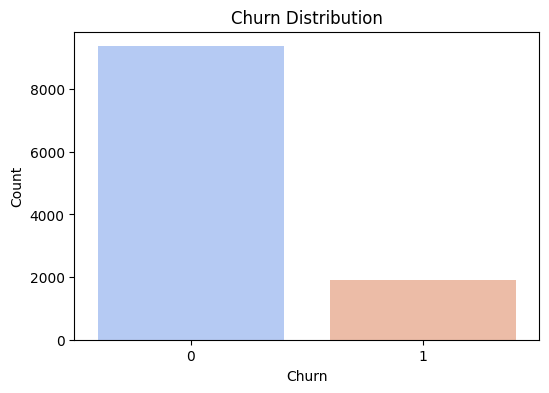

In [2]:
# Churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df, palette='coolwarm')
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

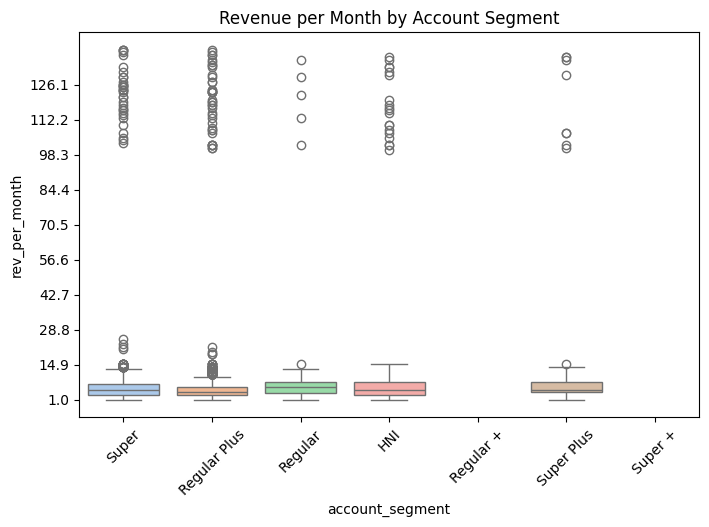

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'rev_per_month' to numeric, forcing errors to NaN and then dropping them
df['rev_per_month'] = pd.to_numeric(df['rev_per_month'], errors='coerce')

plt.figure(figsize=(8, 5))
sns.boxplot(x='account_segment', y='rev_per_month', data=df, palette='pastel', hue='account_segment', legend=False)
plt.title("Revenue per Month by Account Segment")
plt.xticks(rotation=45)

# Adjust y-axis ticks to reduce overlap
y_min = df['rev_per_month'].min()
y_max = df['rev_per_month'].max()
y_ticks = np.arange(y_min, y_max, step=(y_max - y_min) / 10)  # Adjust step dynamically
plt.yticks(y_ticks)

plt.show()


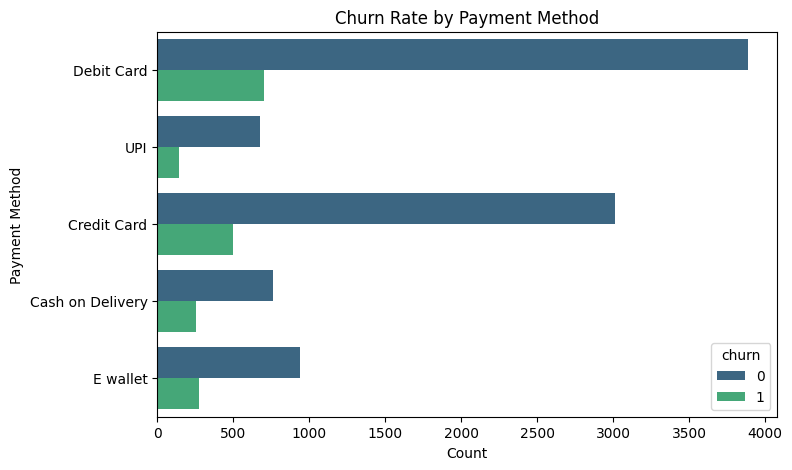

In [4]:
# Churn by Payment Method
plt.figure(figsize=(8, 5))
sns.countplot(y='payment', hue='churn', data=df, palette='viridis')
plt.title("Churn Rate by Payment Method")
plt.xlabel("Count")
plt.ylabel("Payment Method")
plt.show()

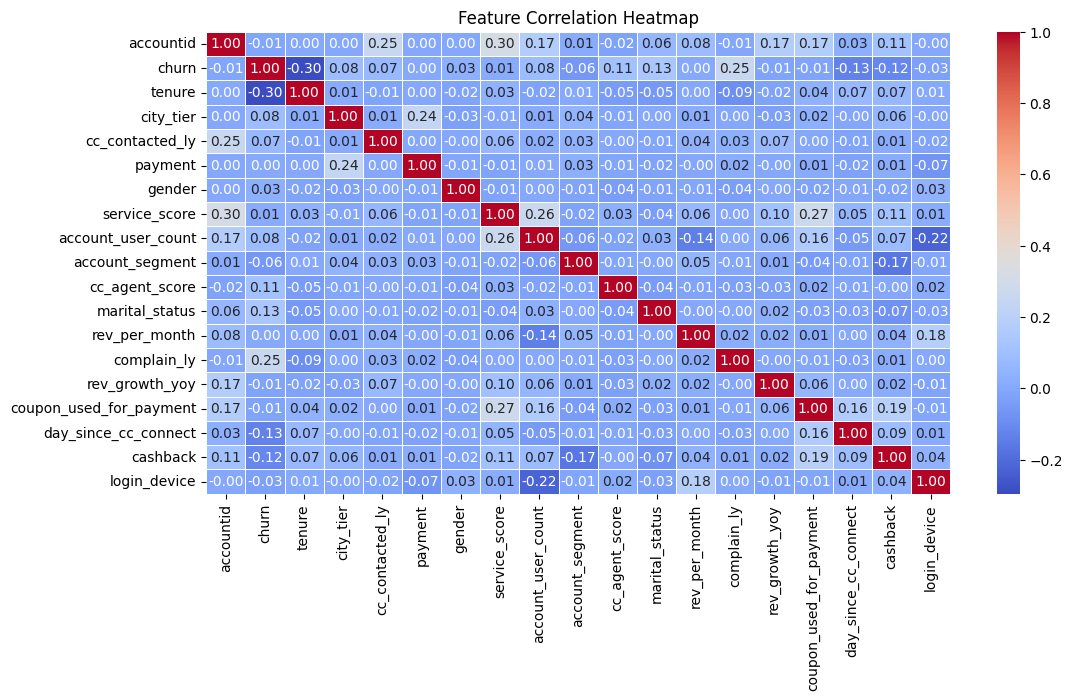

In [8]:
# Convert categorical columns to numerical values using label encoding
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df[col])

# Compute correlation matrix on numerical values only
plt.figure(figsize=(12, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


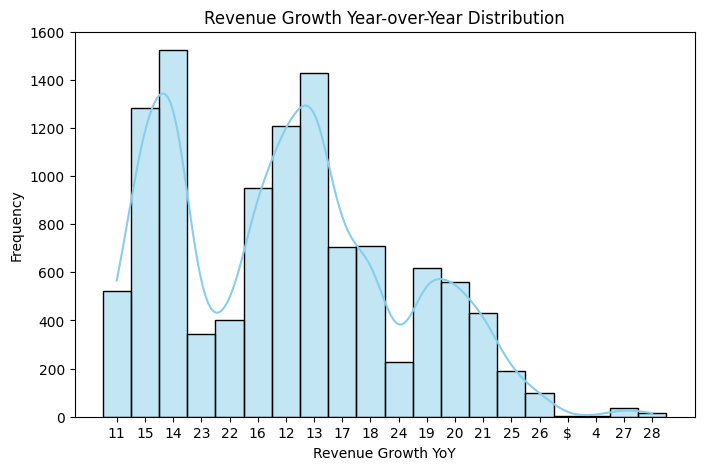

In [6]:
# Revenue growth trend
plt.figure(figsize=(8, 5))
sns.histplot(df['rev_growth_yoy'], bins=20, kde=True, color='skyblue')
plt.title("Revenue Growth Year-over-Year Distribution")
plt.xlabel("Revenue Growth YoY")
plt.ylabel("Frequency")
plt.show()

<ipython-input-7-ea7a757f9ad8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='login_device', data=df, palette='Set2')


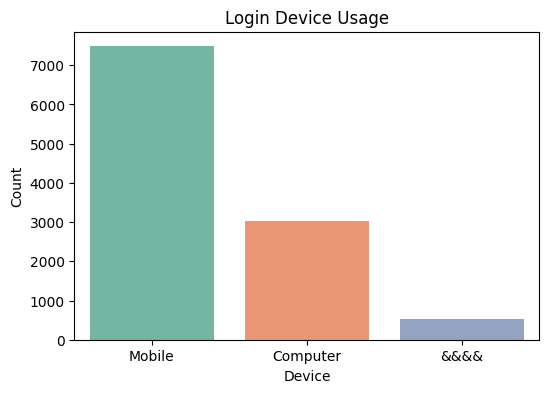

In [7]:
# Login device distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='login_device', data=df, palette='Set2')
plt.title("Login Device Usage")
plt.xlabel("Device")
plt.ylabel("Count")
plt.show()